In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Data Handling of Graphs

In [43]:
import networkx

In [2]:
import torch
from torch_geometric.data import Data

In [4]:
# 3 nodes 0,1,2
# 0 <-> 1 <-> 2
# feature = -1 0 1
edge_index = torch.tensor([[0,1,1,2],
                           [1,0,2,1]], dtype = torch.long)
x = torch.tensor([[-1], [0], [1]], dtype = torch.float)

In [5]:
data = Data(x=x, edge_index=edge_index)

In [6]:
data

Data(x=[3, 1], edge_index=[2, 4])

In [7]:
edge_index = torch.tensor([[0,1], [1,0], [1,2], [2,1]], dtype= torch.long)
x = torch.tensor([[-1], [0], [1]], dtype = torch.float)

In [15]:
edge_index
edge_index.t().contiguous()

tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1]])

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [17]:
data.x
data.edge_index

tensor([[-1.],
        [ 0.],
        [ 1.]])

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [21]:
data.keys()
data['x']
data['edge_index']

['x', 'edge_index']

tensor([[-1.],
        [ 0.],
        [ 1.]])

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [24]:
data.num_nodes
data.num_edges
data.num_node_features

3

4

1

In [26]:
device = torch.device("cuda")
data = data.to(device)

### 2. Loading inbuilt Graph Datasets

In [27]:
from torch_geometric.datasets import TUDataset

In [28]:
dataset = TUDataset(root='./dataset/ENZYMES', name ="ENZYMES")

Processing...
Done!


In [34]:
dataset
len(dataset)
dataset.num_classes
dataset.num_features
dataset.num_node_labels

ENZYMES(600)

600

6

3

3

In [37]:
dataset[0]
dataset[40]

Data(edge_index=[2, 168], x=[37, 3], y=[1])

Data(edge_index=[2, 190], x=[47, 3], y=[1])

In [38]:
sample_data = dataset[0]

In [48]:
sample_data
sample_data.keys()
sample_data.is_directed()
sample_data['edge_index']
sample_data['x']
sample_data['y']

Data(edge_index=[2, 168], x=[37, 3], y=[1])

['y', 'x', 'edge_index']

False

tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
         16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20,
         21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25,
         25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28,
         28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32,
         32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35,
         35, 35, 36, 36, 36, 36],
        [ 1,  2,  3,  0,  2,  3, 24, 27,  0,  1,  3, 27, 28,  0,  1,  2,  4,  5,
         28,  3,  5,  6, 29,  3,  4,  6,  7, 29,  4,  5,  7,  8,  5,  6,  8,  9,
         10,  6,  7,  9,  7,  8, 10, 11, 12,  7,  9, 11, 12,  9, 10, 12, 26

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

tensor([5])

In [44]:
from torch_geometric.utils import to_networkx
import networkx

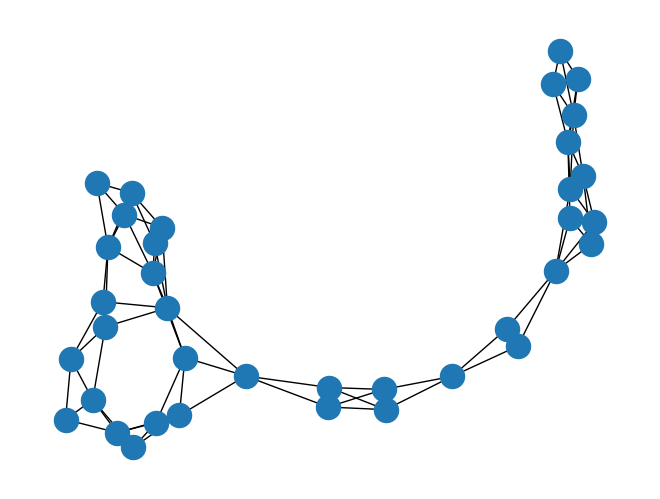

In [46]:
g = to_networkx(sample_data, to_undirected=True)
networkx.draw(g)

In [52]:
dataset = dataset.shuffle()

In [53]:
train_dataset = dataset[:int(0.9 * len(dataset))]
test_dataset = dataset[int(0.9 * len(dataset)):]

In [54]:
from torch_geometric.datasets import Planetoid

In [55]:
dataset = Planetoid(root='./dataset/Cora', name='Cora')

Processing...
Done!


In [60]:
sample_data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [64]:
dataset
len(dataset)
dataset.num_classes
dataset.num_edge_features
dataset.num_features
dataset.num_node_features
dataset[0]

Cora()

1

7

0

1433

1433

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [65]:
sample_data = dataset[0]

In [76]:
sample_data
sample_data.keys()
sample_data['x']
sample_data['y']
sample_data['edge_index']
sample_data['train_mask']
sample_data['val_mask']
sample_data['test_mask']

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

['x', 'y', 'edge_index', 'val_mask', 'train_mask', 'test_mask']

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

tensor([3, 4, 4,  ..., 3, 3, 3])

tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])

tensor([ True,  True,  True,  ..., False, False, False])

tensor([False, False, False,  ..., False, False, False])

tensor([False, False, False,  ...,  True,  True,  True])

### Mini Batches

In [104]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.utils import scatter

In [78]:
dataset = TUDataset(root='./dataset/ENZYMES', name='ENZYMES', use_node_attr=True)

In [79]:
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [80]:
for batch in loader:
    print(batch)
    break

DataBatch(edge_index=[2, 3780], x=[984, 21], y=[32], batch=[984], ptr=[33])


In [97]:
dataset[0]

Data(edge_index=[2, 168], x=[37, 21], y=[1])

In [94]:
batch
batch.keys()
batch['edge_index']
batch[0]
batch[1]
batch[31]

DataBatch(edge_index=[2, 3780], x=[984, 21], y=[32], batch=[984], ptr=[33])

['x', 'y', 'batch', 'edge_index', 'ptr']

tensor([[  0,   0,   0,  ..., 983, 983, 983],
        [  1,   2,  18,  ..., 966, 974, 975]])

Data(edge_index=[2, 164], x=[38, 21], y=[1])

Data(edge_index=[2, 28], x=[7, 21], y=[1])

Data(edge_index=[2, 190], x=[44, 21], y=[1])

In [112]:
batch['x'].shape
batch['x']
batch[0]['x'].shape

torch.Size([984, 21])

tensor([[ 5.0000,  6.0274, 21.7500,  ...,  1.0000,  0.0000,  0.0000],
        [ 3.0000,  5.3299,  6.7200,  ...,  1.0000,  0.0000,  0.0000],
        [ 5.0000,  8.4834, 19.8800,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [ 3.0000,  6.8157, 14.4700,  ...,  0.0000,  1.0000,  0.0000],
        [ 4.0000,  9.4724, 12.8900,  ...,  0.0000,  1.0000,  0.0000],
        [ 5.0000, 12.2965,  9.9500,  ...,  0.0000,  1.0000,  0.0000]])

torch.Size([38, 21])

In [116]:
import pandas as pd

In [121]:
pd.DataFrame(batch[0]['x'])[1].sum() / 38

12.877506456877056

In [124]:
x = scatter(batch['x'], batch['batch'], dim = 0, reduce='mean')
x.shape
x

torch.Size([32, 21])

tensor([[ 5.6053e+00,  1.2878e+01,  2.0047e+01,  8.2474e-01,  9.2353e-01,
          4.6261e+01,  1.7632e+00,  2.1579e+00,  1.6842e+00,  1.6842e+00,
          1.8684e+00,  2.0526e+00,  2.3158e+00,  1.5000e+00,  1.7895e+00,
          1.5526e+00,  2.3684e+00,  1.6842e+00,  3.1579e-01,  6.8421e-01,
          0.0000e+00],
        [ 1.7000e+01,  2.5363e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          0.0000e+00],
        [ 7.1600e+00,  1.4210e+01,  2.5541e+01,  1.1996e+00,  1.1717e+00,
          5.8882e+01,  2.2600e+00,  3.1000e+00,  1.8000e+00,  2.1200e+00,
          2.5200e+00,  2.5200e+00,  2.9000e+00,  1.8600e+00,  2.4000e+00,
          2.1000e+00,  3.2600e+00,  1.8000e+00,  2.8000e-01,  7.2000e-01,
          0.0000e+00],
        [ 6.0000e+00,  1.4301e+01,  2.0456e

### 3. Data Transforms

In [125]:
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='./dataset/ShapeNet', categories=['Airplane'])

Extracting dataset\ShapeNet\shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...
Done!


In [130]:
dataset
dataset[0]
dataset[0]['x']
dataset[0]['category']

ShapeNet(2349, categories=['Airplane'])

Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

tensor([[-0.0392,  0.3344,  0.9416],
        [ 0.0011,  0.3488, -0.9372],
        [-0.2507,  0.9366,  0.2447],
        ...,
        [ 0.6270, -0.5863,  0.5130],
        [-0.2090,  0.9760, -0.0607],
        [-0.2459,  0.9653, -0.0878]])

tensor([0])

In [131]:
import torch_geometric.transforms as T

In [132]:
dataset = ShapeNet(root='./dataset/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6))

C:\Users\Sridhar Kamoji\Python\GNN\.env-gnn\lib\site-packages\torch_geometric\data\dataset.py:239: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, pass `force_reload=True` explicitly to reload the dataset.
  warnings.warn(


In [133]:
dataset[0]

Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])

### 4. Learning Methods in Graphs

In [135]:
from torch_geometric.datasets import Planetoid

In [136]:
dataset = Planetoid(root='./dataset/Cora', name='Cora')

In [137]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [138]:
dataset.num_node_features

1433

In [139]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)
        
    def forward(self, data):
        x, edge_index = data['x'], data['edge_index']
        
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        
        return F.log_softmax(x, dim=1)

In [140]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GCN().to(device)

data = dataset[0].to(device)

In [146]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01, weight_decay=5e-4)

In [147]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [149]:
data['y'][data['train_mask']]

tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2, 0, 0, 4, 3, 3, 3, 2, 3, 1, 3, 5, 3, 4, 6,
        3, 3, 6, 3, 2, 4, 3, 6, 0, 4, 2, 0, 1, 5, 4, 4, 3, 6, 6, 4, 3, 3, 2, 5,
        3, 4, 5, 3, 0, 2, 1, 4, 6, 3, 2, 2, 0, 0, 0, 4, 2, 0, 4, 5, 2, 6, 5, 2,
        2, 2, 0, 4, 5, 6, 4, 0, 0, 0, 4, 2, 4, 1, 4, 6, 0, 4, 2, 4, 6, 6, 0, 0,
        6, 5, 0, 6, 0, 2, 1, 1, 1, 2, 6, 5, 6, 1, 2, 2, 1, 5, 5, 5, 6, 5, 6, 5,
        5, 1, 6, 6, 1, 5, 1, 6, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1],
       device='cuda:0')

In [150]:
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data['train_mask']], data['y'][data['train_mask']])
    loss.backward()
    optimizer.step()

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

In [151]:
model.eval()

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

In [154]:
pred = model(data).argmax(dim=1)
correct = (pred[data['test_mask']] == data['y'][data['test_mask']]).sum()
acc = int(correct) / int(data['test_mask'].sum())
acc

0.81

In [143]:
model

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

### Exercises

In [159]:
d = [[0,1],
     [1,0],
     [1,2],
     [2,1]]
x = torch.tensor([[-1], [0], [1]])

In [158]:
from torch_geometric.data import Data

In [164]:
Data(x, edge_index=torch.tensor(d).t().contiguous())

Data(x=[3, 1], edge_index=[2, 4])

In [165]:
from torch_geometric.datasets import TUDataset

In [166]:
dataset = TUDataset(root='./dataset/IMDB-BINARY', name='IMDB-BINARY')

Processing...
Done!


In [169]:
dataset
len(dataset)
dataset[0]

IMDB-BINARY(1000)

1000

Data(edge_index=[2, 146], y=[1], num_nodes=20)

In [170]:
dataset = dataset.shuffle()

In [171]:
train_data = dataset[:int(0.8 * len(dataset))]
test_data = dataset[int(0.8 * len(dataset)): ]

In [172]:
val_data = test_data[:int(0.5 * len(test_data))]
test_data = test_data[:int(0.5 * len(test_data)):]

In [173]:
train_data
val_data
test_data

IMDB-BINARY(800)

IMDB-BINARY(100)

IMDB-BINARY(100)